In [19]:
import pyproj
import shapely
from shapely import wkb
from shapely import wkt
import pandas as pd
import matplotlib.pyplot as plt

## Чтение файла пожаров и добавление полигонов формата wkt

In [3]:
df_fires = pd.read_csv('collecting the borders of localities/data/fires_avh_3076 (1).csv', sep = ';')

In [4]:
df_fires.head()

,fire_id,dt,lat,lon,area,terr_id,since,id,is_deleted,classname,created_by,edited_by,edited_on,created_on,published,poly
0,1,2017-04-01 08:01:32,53.2895,100.8370,2.5,NaN,2017-04-13 14:53:24,48,f,NaN,NaN,NaN,2021-03-04 19:10:25.861394,NaN,f,0106000020E61000000100000001030000000100000007...
1,2,2017-04-01 08:01:02,51.6256,102.2300,2.6,NaN,2017-04-13 14:53:24,49,f,NaN,NaN,NaN,2021-03-04 19:10:25.861394,NaN,f,0106000020E61000000100000001030000000100000007...
2,3,2017-04-01 08:01:03,51.7021,102.4920,4.0,NaN,2017-04-13 14:53:24,50,f,NaN,NaN,NaN,2021-03-04 19:10:25.861394,NaN,f,0106000020E6100000010000000103000000010000000A...
3,4,2017-04-01 08:01:14,52.4530,103.4880,1.5,NaN,2017-04-13 14:53:24,51,f,NaN,NaN,NaN,2021-03-04 19:10:25.861394,NaN,f,0106000020E61000000100000001030000000100000005...
4,5,2017-04-01 08:01:21,52.5200,99.9813,1.2,NaN,2017-04-13 14:53:24,52,f,NaN,NaN,NaN,2021-03-04 19:10:25.861394,NaN,f,0106000020E61000000100000001030000000100000005...


In [7]:
df_fires['poly_wkt'] = df_fires.poly.apply(lambda x: wkb.loads(x, hex=True))

In [8]:
df_fires.head()

,fire_id,dt,lat,lon,area,terr_id,since,id,is_deleted,classname,created_by,edited_by,edited_on,created_on,published,poly,poly_wkt
0,1,2017-04-01 08:01:32,53.2895,100.8370,2.5,NaN,2017-04-13 14:53:24,48,f,NaN,NaN,NaN,2021-03-04 19:10:25.861394,NaN,f,0106000020E61000000100000001030000000100000007...,"(POLYGON ((100.823028560002 53.28303528, 100.8..."
1,2,2017-04-01 08:01:02,51.6256,102.2300,2.6,NaN,2017-04-13 14:53:24,49,f,NaN,NaN,NaN,2021-03-04 19:10:25.861394,NaN,f,0106000020E61000000100000001030000000100000007...,"(POLYGON ((102.21560669 51.61920166, 102.21236..."
2,3,2017-04-01 08:01:03,51.7021,102.4920,4.0,NaN,2017-04-13 14:53:24,50,f,NaN,NaN,NaN,2021-03-04 19:10:25.861394,NaN,f,0106000020E6100000010000000103000000010000000A...,"(POLYGON ((102.469810489998 51.69487, 102.4666..."
3,4,2017-04-01 08:01:14,52.4530,103.4880,1.5,NaN,2017-04-13 14:53:24,51,f,NaN,NaN,NaN,2021-03-04 19:10:25.861394,NaN,f,0106000020E61000000100000001030000000100000005...,"(POLYGON ((103.48075104 52.44736481, 103.47776..."
4,5,2017-04-01 08:01:21,52.5200,99.9813,1.2,NaN,2017-04-13 14:53:24,52,f,NaN,NaN,NaN,2021-03-04 19:10:25.861394,NaN,f,0106000020E61000000100000001030000000100000005...,"(POLYGON ((99.97621155 52.5144043, 99.97245789..."


In [23]:
df_fires.loc[~df_fires.terr_id.isna()]

,fire_id,dt,lat,lon,area,terr_id,since,id,is_deleted,classname,created_by,edited_by,edited_on,created_on,published,poly,poly_wkt


In [29]:
df_fires.to_csv('data/fires.csv', index = False)

## Чтение файла пожаров

Пожары

In [30]:
df_fires = pd.read_csv('data/fires_distance.csv')
df_fires.shape

C:\Users\yupes\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3343: DtypeWarning: Columns (19) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


(40682, 23)

In [31]:
df_fires.head()

,fid,fire_id,dt,lat,lon,area,terr_id,since,id,is_deleted,...,edited_on,created_on,published,poly,ado,local_id,locality_name,locality_id,HubName,HubDist
0,1,13073,2019/04/27 12:13:30,53.4228,103.092,3.1,NaN,2019/04/27 23:01:34,29662,f,...,2021/03/04 19:10:25,NaN,f,0106000020E61000000100000001030000000100000007...,Аларский,1.0,Аргалей,1.80,1.80,0.604820
1,2,2068,2017/04/28 06:13:22,53.3045,102.421,3.7,NaN,2017/04/28 16:31:26,3932,f,...,2021/03/04 19:10:25,NaN,f,0106000020E61000000100000001030000000100000005...,Аларский,1.0,Вершина,1.17,1.17,0.585057
2,3,946,2017/04/19 11:27:17,53.4304,102.684,2.2,NaN,2017/04/20 09:00:51,1551,f,...,2021/03/04 19:10:25,NaN,f,0106000020E61000000100000001030000000100000007...,Аларский,1.0,Головинское,1.19,1.19,1.122262
3,4,1307,2017/04/24 10:29:04,53.2938,103.034,1.6,NaN,2017/04/25 12:35:08,2200,f,...,2021/03/04 19:10:25,NaN,f,0106000020E61000000100000001030000000100000005...,Аларский,1.0,Егоровская,1.22,1.22,1.567302
4,5,1880,2017/04/27 11:34:55,53.2724,102.835,1.2,NaN,2017/04/28 08:25:00,3417,f,...,2021/03/04 19:10:25,NaN,f,0106000020E61000000100000001030000000100000005...,Аларский,1.0,Забитуй,1.24,1.24,0.546150


# Создание датасета с некорректными полигонами пожаров:

In [42]:
df_fires_old = pd.read_csv('data/fires.csv')

In [45]:
df_fires_old.loc[~df_fires_old.id.isin(df_fires.id)].to_csv('fires_multipolygons.csv', index = False)

In [59]:
df_fires_old.shape

(45449, 17)

# Добавление подсчитанных мультиполигонов к основному

In [46]:
df_fires_mp = pd.read_csv('data/fires_distance_mp.csv')

In [48]:
df_fires.columns,df_fires_mp.columns

(Index(['fid', 'fire_id', 'dt', 'lat', 'lon', 'area', 'terr_id', 'since', 'id',
        'is_deleted', 'classname', 'created_by', 'edited_by', 'edited_on',
        'created_on', 'published', 'poly', 'ado', 'local_id', 'locality_name',
        'locality_id', 'HubName', 'HubDist'],
       dtype='object'),
 Index(['fire_id', 'dt', 'lat', 'lon', 'area', 'terr_id', 'since', 'id',
        'is_deleted', 'classname', 'created_by', 'edited_by', 'edited_on',
        'created_on', 'published', 'poly', 'ado', 'local_id', 'locality_id',
        'locality_name', 'HubName', 'HubDist'],
       dtype='object'))

In [49]:
df_fires.drop(columns = 'fid', inplace = True)

In [51]:
set(df_fires.columns) - set(df_fires_mp.columns)

set()

In [64]:
pd.concat([df_fires, df_fires_mp])[['id', 'HubDist']].value_counts()

id     HubDist   
4806   7.833890      4
19463  4.804861      4
3704   7.833890      4
1981   8.562388      4
5096   7.833890      4
                    ..
15228  188.016447    1
15229  150.627269    1
15230  192.266745    1
15231  191.998859    1
45496  507.613118    1
Length: 45449, dtype: int64

Количество записей датасета увеличилось засчет того, что какие-то пожары пересекают одновременно несколько населенных пунктов, однако ближайшее растояние к таким записям посчиталось однозначно до одного населенного пункта.

In [65]:
df_fires = pd.concat([df_fires, df_fires_mp])

In [69]:
df_fires.drop(columns = 'terr_id').rename(columns = {'HubName':'nearest_loc_name', 'HubDist':'distance_loc', 'local_id':'ado_id'}, inplace = True)

In [71]:
df_fires['in_locality'] = 0
df_fires.loc[df_fires.locality_id.isna(), 'in_locality'] = 1

In [73]:
df_fires['poly_wkt'] = df_fires.poly.apply(lambda x: wkb.loads(x, hex=True))

In [74]:
df_fires.to_csv('data/fires.csv', index = False)

# Статистика

In [4]:
df_fires = pd.read_csv('data/fires.csv')

Количество пожаров в Иркутской области

In [5]:
df_fires.loc[~df_fires.ado.isna()].shape[0]

23045

Количество пожаров в населенных пунктах

In [6]:
df_fires.locality_name.value_counts()

Усть-Кут        111
Ангарск          85
Усть-Када        40
Ока 2-я          38
Куйтун           37
               ... 
Сосновый Бор      1
Николаевка        1
Парфеновка        1
Новолисиха        1
Аргалей           1
Name: locality_name, Length: 312, dtype: int64

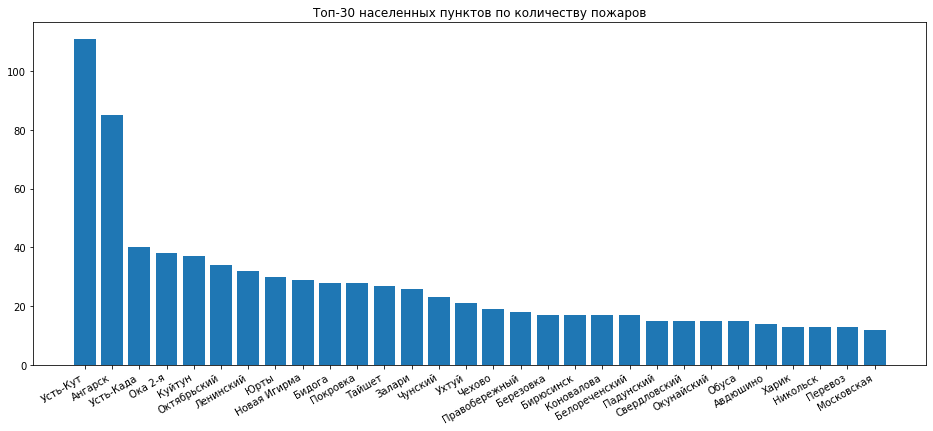

In [20]:
plt.figure(figsize = (16, 7))
plt.title('Топ-30 населенных пунктов по количеству пожаров')
plt.bar(df_fires.locality_name.value_counts()[:30].keys(),df_fires.locality_name.value_counts()[:30].values)
plt.gcf().autofmt_xdate()

In [76]:
df_fires.locality_name.value_counts().sum()

1514

In [43]:
df_fires[['locality_name', 'fire_id']].value_counts()

locality_name  fire_id
Усть-Кут       63         87
Новая Игирма   2084       27
Юрты           605        21
Ухтуй          6643       18
Ока 2-я        5212       18
                          ..
Куряты         448         1
Кумарейка      2382        1
Култук         8537        1
Куйтун         13824       1
Ялга-Узур      4750        1
Length: 705, dtype: int64

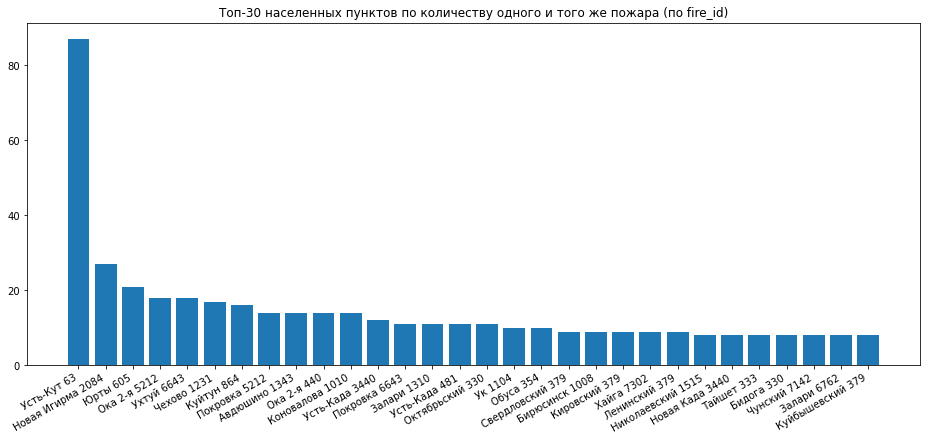

In [34]:
plt.figure(figsize = (16, 7))
plt.title('Топ-30 населенных пунктов по количеству одного и того же пожара (по fire_id)')
plt.bar((df_fires.locality_name+' '+df_fires.fire_id.astype(str)).value_counts()[:30].keys(),\
        (df_fires.locality_name+' '+df_fires.fire_id.astype(str)).value_counts()[:30].values)
plt.gcf().autofmt_xdate()

In [52]:
temp_df = pd.DataFrame(df_fires[['locality_name', 'fire_id']].value_counts()).reset_index().locality_name.value_counts()
temp_df

Ангарск          53
Ленинский        21
Октябрьский      16
Правобережный    13
Усть-Када        13
                 ..
Халюты            1
Хайрюзовка        1
Уховский          1
Ут                1
Ялга-Узур         1
Name: locality_name, Length: 312, dtype: int64

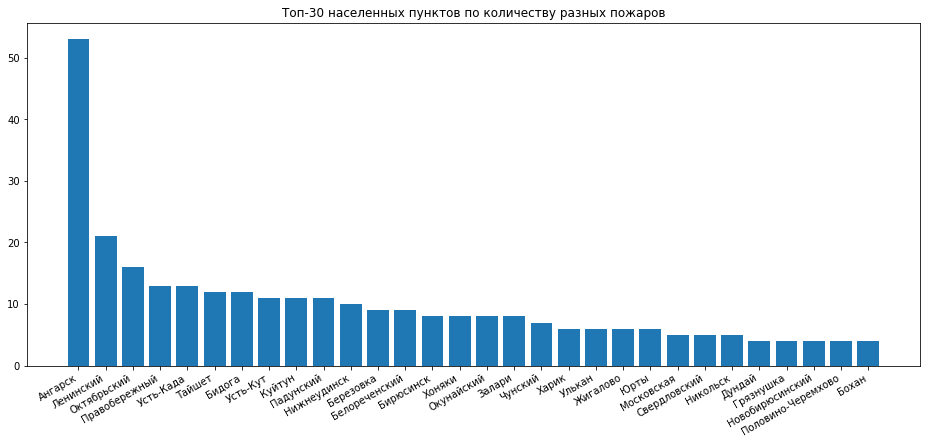

In [48]:
plt.figure(figsize = (16, 7))
plt.title('Топ-30 населенных пунктов по количеству разных пожаров')
plt.bar(temp_df[:30].keys(),\
        temp_df[:30].values)
plt.gcf().autofmt_xdate()

Гистограммы по удаленности пожаров от населенных пунктов

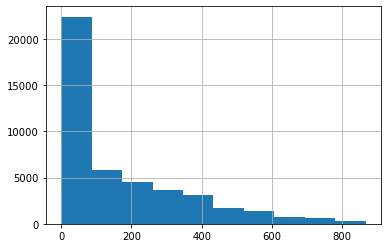

In [50]:
df_fires.loc[df_fires.locality_name.isna(), 'distance_loc'].hist()

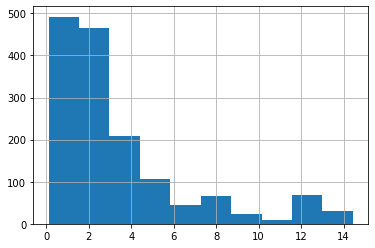

In [51]:
df_fires.loc[~df_fires.locality_name.isna(), 'distance_loc'].hist()

In [80]:
print('Среднее расстояние от пожаров до населенных пунктов, которые не пересекаются с ними: %s' % (df_fires.loc[df_fires.locality_name.isna(), 'HubDist'].mean()), \
    '\nСреднее расстояние от пожаров до населенных пунктов, которые находятся в них: %s' % (df_fires.loc[~df_fires.locality_name.isna(), 'HubDist'].mean()))

Среднее расстояние от пожаров до населенных пунктов, которые не пересекаются с ними: 174.65975439314073 
Среднее расстояние от пожаров до населенных пунктов, которые находятся в них: 3.42361518866789
